In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BusinessReport-10-07-24 (1).csv to BusinessReport-10-07-24 (1) (9).csv


In [ ]:
import pandas as pd
df_product_details =pd.read_csv("BusinessReport-10-07-24 (1).csv")

In [ ]:
# Display basic information about the dataset
print(df_product_details.info())

# Show the first few rows
print(df_product_details.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   (Parent) ASIN                              2244 non-null   object
 1   (Child) ASIN                               2244 non-null   object
 2   Title                                      2244 non-null   object
 3   Sessions - Total                           2244 non-null   object
 4   Sessions – Total – B2B                     2244 non-null   object
 5   Session Percentage - Total                 2244 non-null   object
 6   Session Percentage – Total – B2B           2244 non-null   object
 7   Page Views - Total                         2244 non-null   object
 8   Page Views – Total – B2B                   2244 non-null   object
 9   Page Views Percentage - Total              2244 non-null   object
 10  Page Views Percentage – Total – B2B 

In [ ]:
df_product_details.drop(columns=["Ordered Product Sales"], inplace= True)
df_product_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   (Parent) ASIN                              2244 non-null   object
 1   (Child) ASIN                               2244 non-null   object
 2   Title                                      2244 non-null   object
 3   Sessions - Total                           2244 non-null   object
 4   Sessions – Total – B2B                     2244 non-null   object
 5   Session Percentage - Total                 2244 non-null   object
 6   Session Percentage – Total – B2B           2244 non-null   object
 7   Page Views - Total                         2244 non-null   object
 8   Page Views – Total – B2B                   2244 non-null   object
 9   Page Views Percentage - Total              2244 non-null   object
 10  Page Views Percentage – Total – B2B 

In [ ]:
df_product_details["Session Percentage - Total"].unique()


array(['1.03%', '0.97%', '0.48%', '0.38%', '0.29%', '0.32%', '0.34%',
       '0.63%', '0.23%', '0.07%', '0.71%', '0.10%', '1.58%', '0.19%',
       '0.17%', '0.18%', '0.26%', '0.05%', '0.04%', '0.03%', '0.31%',
       '0.56%', '0.13%', '0.14%', '0.53%', '0.20%', '0.94%', '0.79%',
       '0.16%', '0.06%', '0.40%', '0.68%', '0.09%', '0.08%', '0.21%',
       '0.12%', '0.15%', '1.88%', '0.43%', '0.02%', '0.22%', '0.41%',
       '0.49%', '0.30%', '0.01%', '0.11%', '0.36%', '0.00%', '1.06%',
       '0.66%', '0.28%', '1.23%', '1.63%', '0.27%', '0.58%', '0.35%',
       '0.37%', '0.62%', '0.65%', '1.47%', '2.10%', '0.46%', '0.33%',
       '0.25%', '1.11%', '0.55%', '0.44%', '0.72%', '0.78%', '3.72%',
       '1.36%', '0.42%', '5.40%'], dtype=object)

In [ ]:
# Top and bottom performers based on ordered product sales

# Convert 'Ordered Product Sales - B2B' to string type before applying string methods
df_product_details["Ordered Product Sales - B2B"] = df_product_details["Ordered Product Sales - B2B"].astype(str)
df_product_details["Ordered Product Sales - B2B"] = df_product_details["Ordered Product Sales - B2B"].str.replace(",", "").str.replace("₹", "").str.replace(" ", "").astype(float) # Assign the result back to the column

# Filter out products with zero sales
df_non_zero_sales = df_product_details[df_product_details["Ordered Product Sales - B2B"] > 0]

# Get top and bottom performers
top_performers = df_product_details.nlargest(10, 'Ordered Product Sales - B2B')
bottom_performers = df_non_zero_sales.nsmallest(10, 'Ordered Product Sales - B2B')

# Print results
print(top_performers[['Title', 'Ordered Product Sales - B2B']])
print(bottom_performers[['Title', 'Ordered Product Sales - B2B']])


                                                 Title  \
235  NCERT?Biology?Booster with NCERT Biologics for...   
0    Problems in Physical Chemistry for JEE Mains &...   
72   UPSC CIVIL SERVICES (HINDI OPTIONAL) COMBO SET...   
759  NOOTAN ISC SET OF CHEMISTRY AND PHYSICS CLASS ...   
2    Problems in Inorganic Chemistry for JEE (Main ...   
10   Advanced Problems in Mathematics for JEE (Main...   
1    Advanced Problems In Organic Chemistry For JEE...   
4    Elementary Problems in Organic Chemsitry for N...   
194  Oswaal One For All Olympiad Previous Years Sol...   
52                                       EYE MAKE - UP   

     Ordered Product Sales - B2B  
235                       6000.0  
0                         4171.0  
72                        3130.0  
759                       2499.0  
2                         2220.0  
10                        2189.0  
1                         1953.0  
4                         1682.0  
194                       1472.0  
52         

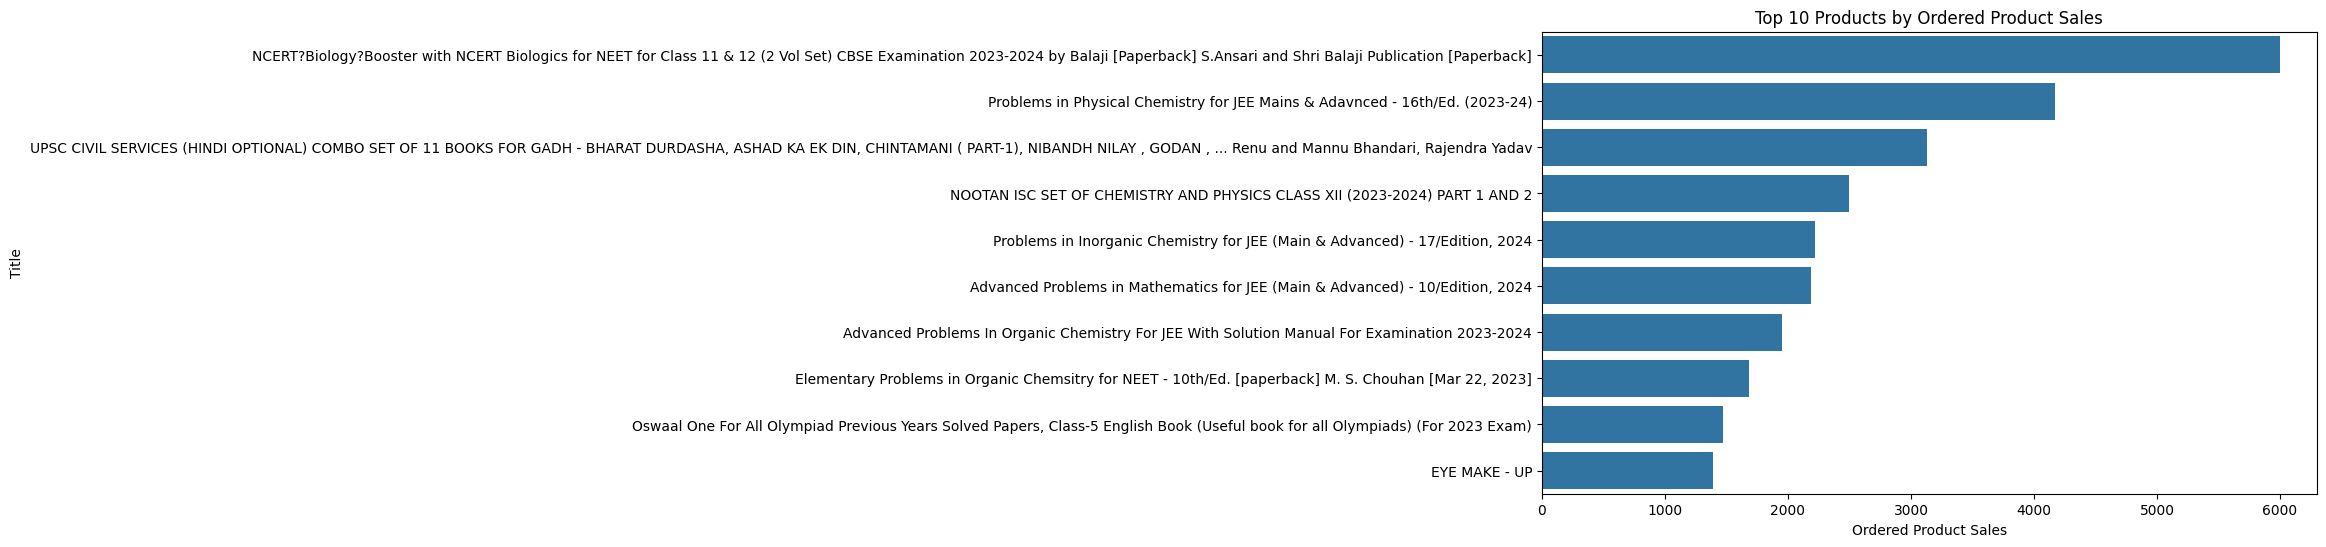

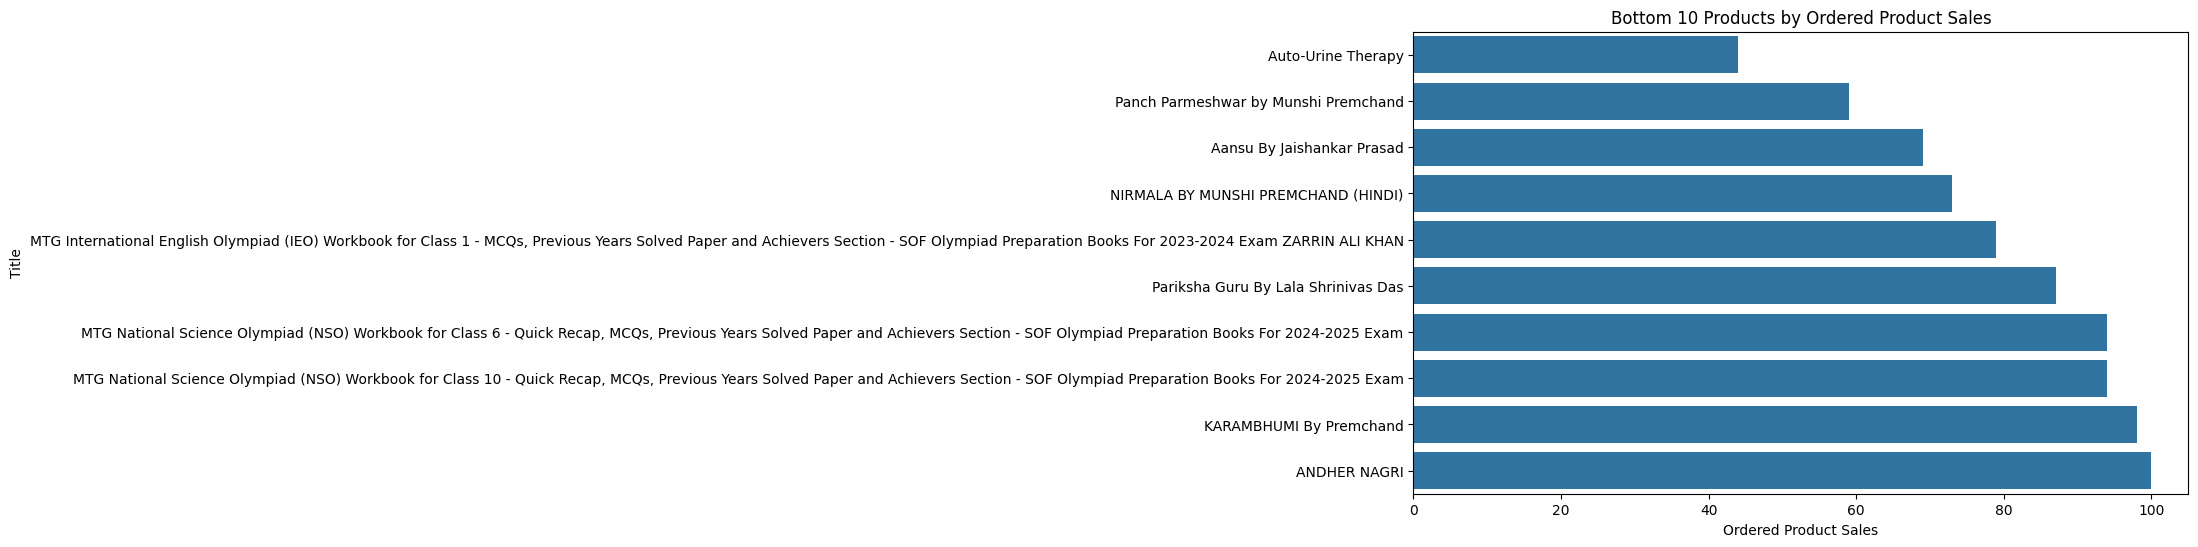

In [ ]:
# Bar chart for top sales generating products
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Ordered Product Sales - B2B', y='Title', data=top_performers)
plt.title('Top 10 Products by Ordered Product Sales')
plt.xlabel('Ordered Product Sales')
plt.ylabel('Title')
plt.show()

# Bar chart for bottom sales generating products
plt.figure(figsize=(10, 6))
sns.barplot(x='Ordered Product Sales - B2B', y='Title', data=bottom_performers)
plt.title('Bottom 10 Products by Ordered Product Sales')
plt.xlabel('Ordered Product Sales')
plt.ylabel('Title')
plt.show()

#Product Performance Analysis:

The bar plot of top 10 products by Units Ordered visually represents the best-selling products.

<ipython-input-139-e3aa29e3b822>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


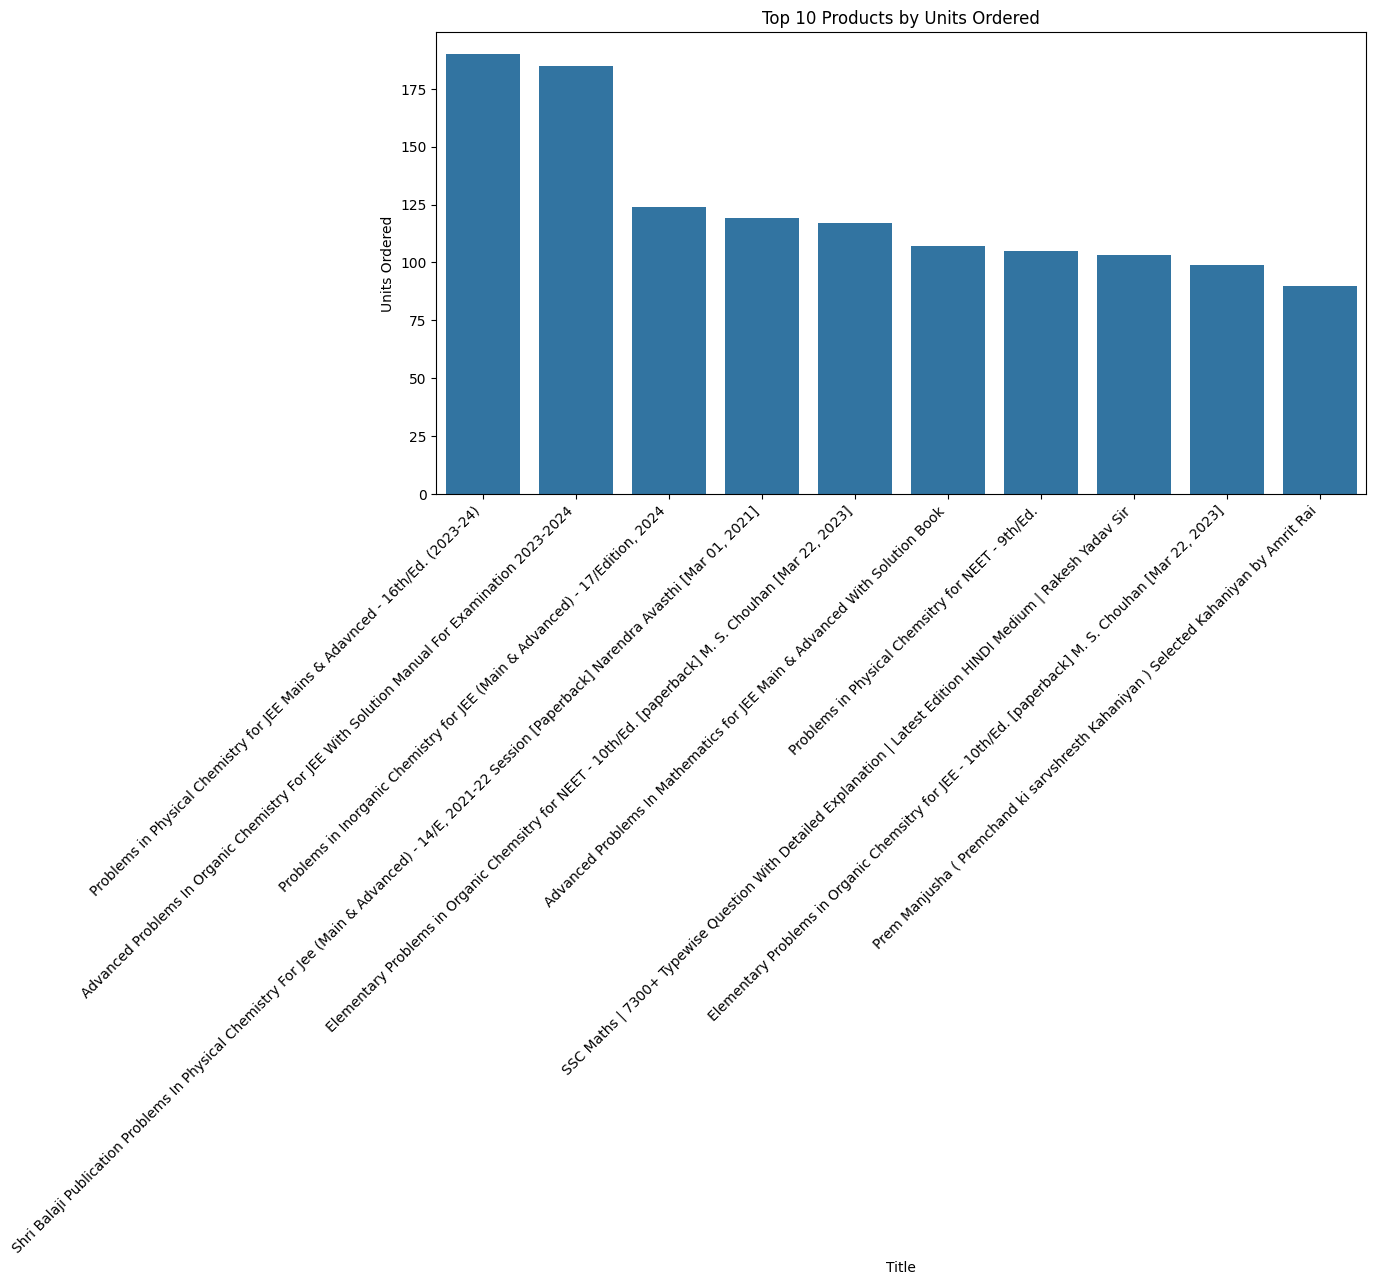

In [ ]:
# Top 10 products by Units Ordered
top_units = df_product_details.nlargest(10, 'Units Ordered')
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Units Ordered', data=top_units)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Products by Units Ordered')
plt.tight_layout()
plt.show()

#Sessions :
The number of unique visits to an Amazon page by a user within a 24-hour period.
Let’s suppose a customer visits your Amazon store page. While on your page, they viewed two products and only added one unit to their basket. They browsed, viewed more products, added one or two of them, and removed them.

In this example, the customer interacted with your product and Amazon store in multiple ways (page views), however, all these actions come under one single session.

#Page Views:
A page view is recorded every time a page is loaded or reloaded in a browser. It simply counts the total number of times a page is viewed, regardless of the user or session.

In [ ]:
# Top products based on sessions and page views

# Convert 'Sessions - Total' to numeric, handling non-numeric values
df_product_details["Sessions - Total"] = df_product_details["Sessions - Total"].astype(str)
df_product_details["Sessions - Total"] = df_product_details["Sessions - Total"].str.replace(",", "").str.replace(" ", "").astype(float)

# Convert 'Page Views - Total' to numeric, handling non-numeric values
df_product_details["Page Views - Total"] = df_product_details["Page Views - Total"].astype(str)
df_product_details["Page Views - Total"] = pd.to_numeric(df_product_details["Page Views - Total"].str.replace(",", ""), errors='coerce') # Use errors='coerce' to handle non-numeric values

top_sessions = df_product_details.nlargest(10, 'Sessions - Total')
top_page_views = df_product_details.nlargest(10, 'Page Views - Total')
print(top_sessions[['Title', 'Sessions - Total']])
print(top_page_views[['Title', 'Page Views - Total']])

                                                  Title  Sessions - Total
1884  Word Power Made Easy By Norman Lewis (More tha...          203881.0
1406  Oxford Student Atlas for India, Fourth Edition...          140663.0
1084  Oswaal NCERT One for All Book For UPSC and Sta...           79215.0
63    Oswaal CBSE 20 Combined Sample Question papers...           71179.0
281   NCERT Summary (Class 6 to 12) (useful for UPSC...           61385.0
12    Problems in Physical Chemistry for JEE (Main &...           59616.0
985   Oxford Student Atlas Hindi | 3rd Edition | For...           55492.0
1413  Mathematics class 8th - by R.D. Sharma (2024-2...           51437.0
263   Rashmirathi (Jnanpith Award Winner, 1972) - Hindi           46267.0
1113  Oswaal CBSE 10 Previous Years Solved Papers, C...           42000.0
                                                  Title  Page Views - Total
1884  Word Power Made Easy By Norman Lewis (More tha...              324888
1406  Oxford Student Atlas for Ind

We see that the same 10 products have maximum sessions as well as page views.These are **high engagement products**.

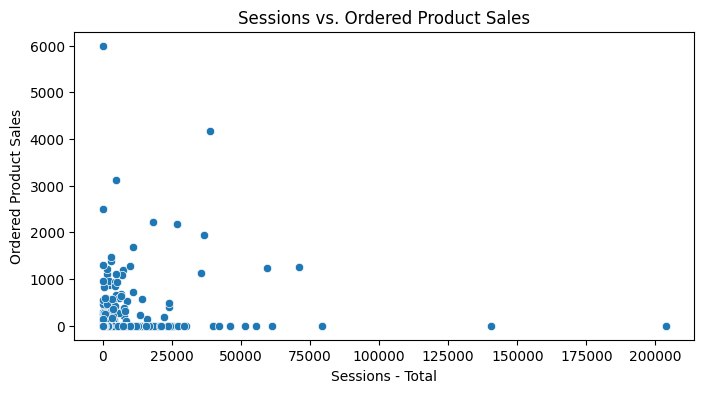

In [ ]:
# Scatter plot for sessions vs. sales
plt.figure(figsize=(8,4))
sns.scatterplot(x='Sessions - Total', y='Ordered Product Sales - B2B', data=df_product_details)
plt.title('Sessions vs. Ordered Product Sales')
plt.xlabel('Sessions - Total')
plt.ylabel('Ordered Product Sales')
plt.show()

**No correlation between the number of sessions and ordered product sales.** We see products with high sales across various session counts, and products with low sales even at high session counts.

Most data points are clustered in the lower left corner of the plot, indicating that the **majority of products have relatively low numbers of sessions and lower sales figures.**

There are a few notable outliers with very high sales (around 4000-6000) despite relatively low session counts (under 25,000). **These represent highly efficient products in terms of converting sessions to sales.**

**Potential for Optimization: Products with high session counts but low sales (visible on the bottom right) may represent opportunities for improving conversion rates.**

                                                 Title  \
668                   Paper folding series of 04 books   
663                                          BALCHANMA   
460          Mask Mania jungle tales (colour and wear)   
372  Active Reader The Greedy Dog (Level-I) Stories...   
442  A Vision of india: Vision of India Kerala and ...   
491  ANDHER NAGRI (TEXT WITH NOTES)-BHARTEDNU HARIS...   
600  Bhartiya Vayu Sena Airman Group 'X' BHAUTIKI (...   
655  SSB Interview for Indian Armed Forces Complete...   
706  Solved Papers ( 10 Paper ) of NDA/NA (National...   
88                  Meri Asafaltayen by Babu Gulab Rai   

     Unit Session Percentage  
668                    27.78  
663                    25.00  
460                    20.00  
372                    19.05  
442                    17.65  
491                    16.67  
600                    16.67  
655                    16.67  
706                    16.67  
88                     16.33  
                    

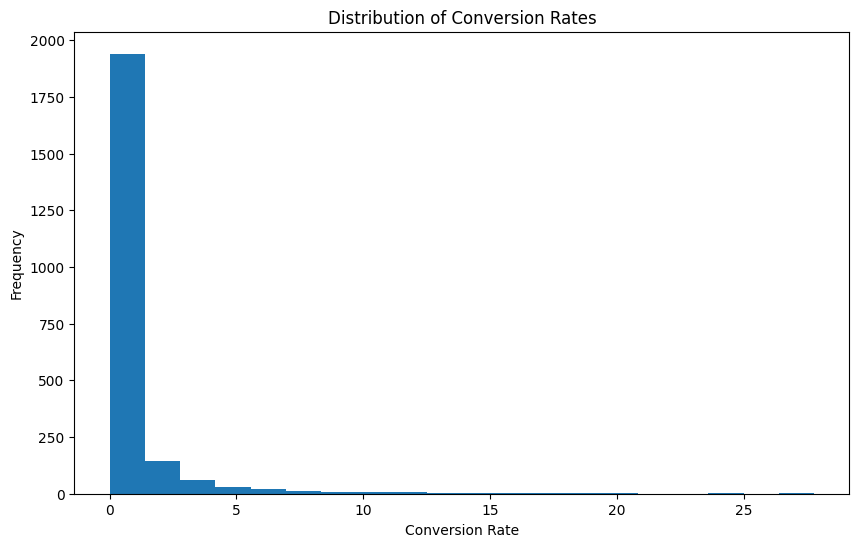

In [ ]:
# Top and bottom 10 products by conversion rate

# Convert 'Unit Session Percentage' to numeric, handling non-numeric values
df_product_details["Unit Session Percentage"] = df_product_details["Unit Session Percentage"].astype(str)
df_product_details["Unit Session Percentage"] = df_product_details["Unit Session Percentage"].str.replace(",", "").str.replace("%", "").astype(float)

# Filter out products with zero conversion rates
df_non_zero_conversion = df_product_details[df_product_details["Unit Session Percentage"] > 0]

# Get top and bottom performers by conversion rate
top_conversion_rates = df_product_details.nlargest(10, 'Unit Session Percentage')
bottom_conversion_rates = df_non_zero_conversion.nsmallest(10, 'Unit Session Percentage')

# Print results
print(top_conversion_rates[['Title', 'Unit Session Percentage']])
print(bottom_conversion_rates[['Title', 'Unit Session Percentage']])

# Histogram of Conversion Rates
plt.figure(figsize=(10, 6))
plt.hist(df_product_details['Unit Session Percentage'], bins=20)
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Conversion Rates')
plt.show()


**NOTE**: The Top 10 high engagement products and the top 10 best converting products do not coincide. This means that high engagement doesn't automatically imply conversion of the product.

This is also the inference that we got from the Scatter plot for sessions vs. sales.

#Product Improvement Analysis

Sessions Percentage = (Number of sessions for this product / Total number of sessions across all products) * 100

This is the metric that tells you how often a product is being viewed relative to other products. It's a measure of visibility or traffic.

Unit Session Percentage = (Number of units ordered / Number of sessions for this product) * 100

It tells you how well a product converts views into sales. It's a measure of effectiveness or conversion rate.

While Sessions Percentage shows you which products are getting attention, Unit Session Percentage shows you which products are actually convincing viewers to buy.


* Low Sessions % + Low Unit Session %: Product needs overall improvement

* Low Sessions % + High Unit Session %: Product needs more visibility

* High Sessions % + Low Unit Session %: Product needs conversion optimization

* High Sessions % + High Unit Session %: Product is performing well


PS: "high" and "low" are relative terms and should be considered in the context of your overall product catalog and industry benchmarks.

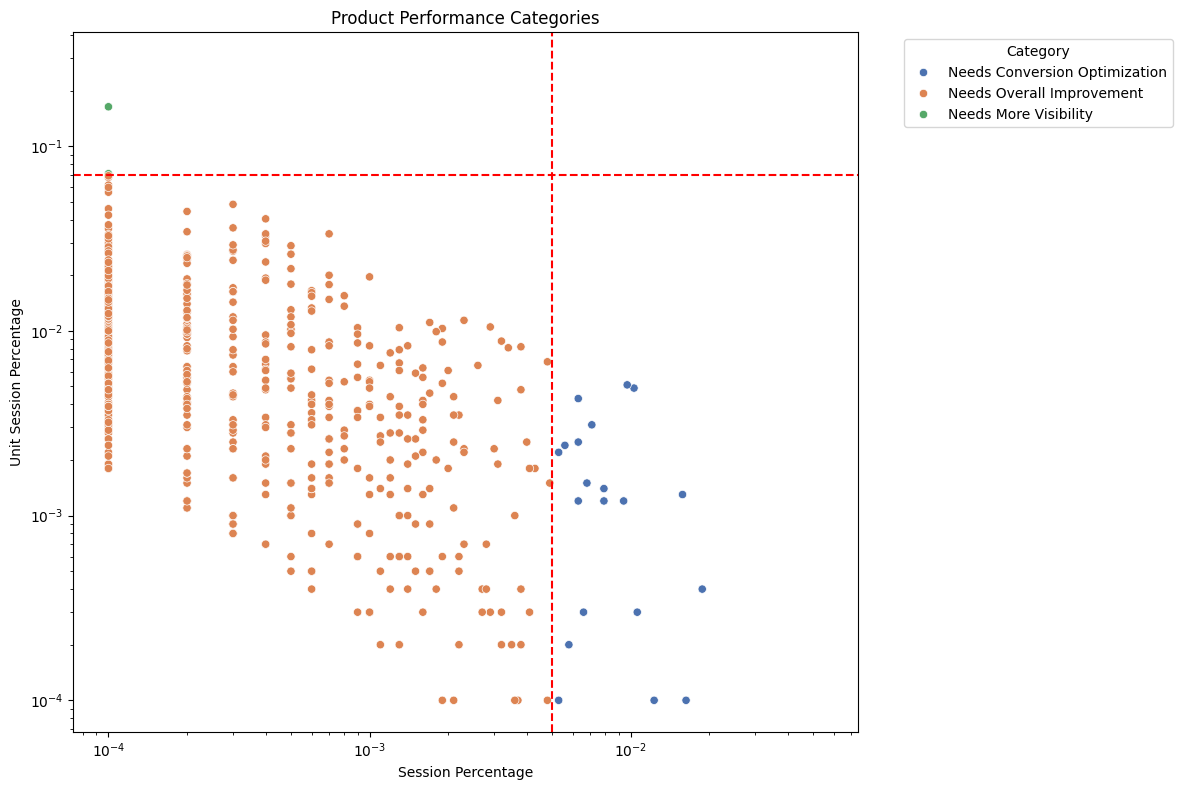

Category Summary:
Category
Needs Overall Improvement        2164
Needs More Visibility              45
Needs Conversion Optimization      35
Name: count, dtype: int64

Percentage of Products in Each Category:
Category
Needs Overall Improvement        96.434938
Needs More Visibility             2.005348
Needs Conversion Optimization     1.559715
Name: count, dtype: float64

Products that Need More Visibility:
Title: Meri Asafaltayen by Babu Gulab Rai
Session %: 0.0100%
Unit Session %: 16.3300%
---
Title: Somnath By Acharya Chatursen
Session %: 0.0100%
Unit Session %: 7.0900%
---
Title: Navneet Combo of Aapka Aarogya Aapke Hath Me Part 1 & Part 2
Session %: 0.0000%
Unit Session %: 7.6400%
---
Title: Navneet The Navneet Pictopedia - Our Universe
Session %: 0.0000%
Unit Session %: 13.3300%
---
Title: Yogasan - Pranayam (Hindi)
Session %: 0.0000%
Unit Session %: 8.0000%
---
Title: Navneet The Navneet Pictopedia - Great Personalities
Session %: 0.0000%
Unit Session %: 10.6700%
---
Title: PAT

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_product_details['Session Percentage - Total'] = df_product_details['Session Percentage - Total'].astype(str)
df_product_details['Session Percentage - Total']=df_product_details['Session Percentage - Total'].str.replace("%", "").astype(float)/100
df_product_details['Unit Session Percentage'] = df_product_details['Unit Session Percentage']/100

# Define thresholds
session_threshold = 0.005  # 0.5%
unit_session_threshold = 0.07  # 7%

def categorize_product(row):

    if row['Session Percentage - Total'] < session_threshold and row['Unit Session Percentage'] < unit_session_threshold:
        return 'Needs Overall Improvement'
    elif row['Session Percentage - Total'] < session_threshold and row['Unit Session Percentage'] >= unit_session_threshold:
        return 'Needs More Visibility'
    elif row['Session Percentage - Total'] >= session_threshold and row['Unit Session Percentage'] < unit_session_threshold:
        return 'Needs Conversion Optimization'
    else:
        return 'Performing Well'

df_product_details['Category'] = df_product_details.apply(categorize_product, axis=1)

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_product_details, x='Session Percentage - Total', y='Unit Session Percentage', hue='Category', palette='deep')

plt.title('Product Performance Categories')
plt.xlabel('Session Percentage')
plt.ylabel('Unit Session Percentage')

# Add lines for thresholds
plt.axvline(x=session_threshold, color='r', linestyle='--')
plt.axhline(y=unit_session_threshold, color='r', linestyle='--')

plt.xscale('log')
plt.yscale('log')

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print summary of categories
category_summary = df_product_details['Category'].value_counts()
print("Category Summary:")
print(category_summary)

# Print percentage of products in each category
category_percentage = (category_summary / len(df_product_details)) * 100
print("\nPercentage of Products in Each Category:")
print(category_percentage)

# Display products that need more visibility
print("\nProducts that Need More Visibility:")
visibility_products = df_product_details[df_product_details['Category'] == 'Needs More Visibility']
for _, product in visibility_products.iterrows():
    print(f"Title: {product['Title']}")
    print(f"Session %: {product['Session Percentage - Total']*100:.4f}%")
    print(f"Unit Session %: {product['Unit Session Percentage']*100:.4f}%")
    print("---")

df_product_details['Session Percentage - Total']=df_product_details['Session Percentage - Total']* 100
df_product_details['Unit Session Percentage'] = df_product_details['Unit Session Percentage']*100


# Display products that need conversion optimization
print("\nProducts that Need Conversion Optimization:")
optimization_products = df_product_details[df_product_details['Category'] == 'Needs Conversion Optimization']
for _, product in optimization_products.iterrows():
    print(f"Title: {product['Title']}")
    print(f"ASIN: {product['(Child) ASIN']}")
    print(f"Session %: {product['Session Percentage - Total']*100:.4f}%")
    print(f"Unit Session %: {product['Unit Session Percentage']*100:.4f}%")
    print("---")

#Actionable tips :

A product with a **Low Session Percentage** and a **High Unit Session Percentage** is a prime candidate for Sponsored Products advertising and other paid advertising platforms. You will be paying each time customers click through to the product page, but the high conversion rate means that you’ll get the most value out of those clicks.

A **Low Unit Session Percentage** and **High Session Percentage** means a poor product page, so you should focus on improving the product listing information to take advantage of the good volume of traffic to this page.